In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
#import Credit One data
credit = pd.read_csv('default of credit card clients.csv', header =1)

In [3]:
#check the first 5 rows of the data frame
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# Column names
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
# Information about the data set
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [11]:
#check for any missing values
credit.isnull().values.any()

False

In [3]:
#remove ID 
credit.drop('ID', axis = 1, inplace=True)
#rename 'default payment next month' to DEFAULT
credit.rename(columns={'default payment next month':'DEFAULT'}, inplace = True)
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [4]:
#combine values of 'others' in education
x = {1:1, 2:2, 3:3, 0:4,5:4,6:4}
credit.EDUCATION = credit.EDUCATION.replace(x)
credit.EDUCATION.describe()

count    30000.000000
mean         1.842267
std          0.744494
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: EDUCATION, dtype: float64

In [20]:
#count of default payment next month
credit.groupby('DEFAULT')['DEFAULT'].count()

DEFAULT
0    23364
1     6636
Name: DEFAULT, dtype: int64

In [53]:
# Percentage of defaults, 0-No default 1-Default
perDef = 100*(credit.groupby('DEFAULT')['DEFAULT'].count()) / credit.shape[0]
print(f"Percent of {perDef}")

Percent of DEFAULT
0    77.88
1    22.12
Name: DEFAULT, dtype: float64


In [14]:
# Number of people for each education level
credit.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
1    10585
2    14030
3     4917
4      468
Name: EDUCATION, dtype: int64

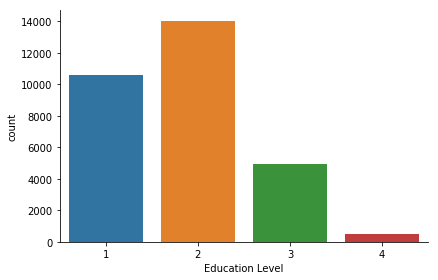

In [15]:
# Instead of a group by, use seaborn to plot the count of people in each education level
fg = sns.factorplot('EDUCATION', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Education Level')

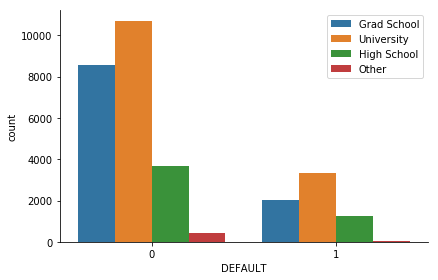

In [24]:
# Plot of education by default
sns.factorplot('DEFAULT', data = credit, hue='EDUCATION', kind='count', aspect = 1.5, legend=False)
plt.legend(['Grad School', 'University', 'High School', 'Other'])

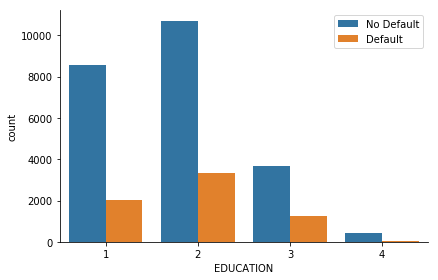

In [27]:
# Default by education
sns.factorplot('EDUCATION', data = credit, hue='DEFAULT', kind='count', aspect = 1.5, legend=False)
plt.legend(['No Default', 'Default'])

In [16]:
credit.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

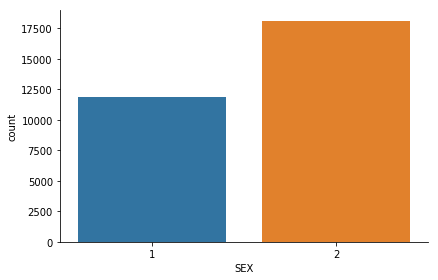

In [26]:
sns.factorplot('SEX', data=credit, kind='count', aspect=1.5)
# About 1.5 times more females to males

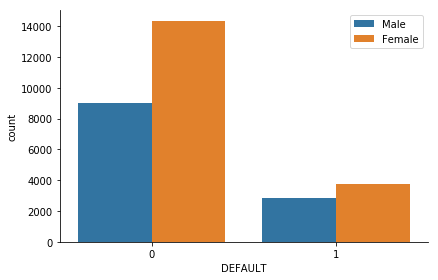

In [25]:
# Plot of sex by default
sns.factorplot('DEFAULT', data = credit, hue='SEX', kind='count', aspect = 1.5, legend=False)
plt.legend(['Male', 'Female'])

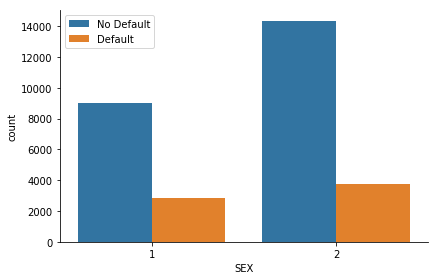

In [28]:
# Another view of education v default
sns.factorplot('SEX', data = credit, hue='DEFAULT', kind='count', aspect = 1.5, legend=False)
plt.legend(['No Default', 'Default'])

In [30]:
# Default by sex pivot table
credit.pivot_table('DEFAULT', 'SEX', aggfunc = np.sum, margins = True)

,DEFAULT
SEX,
1,2873
2,3763
All,6636


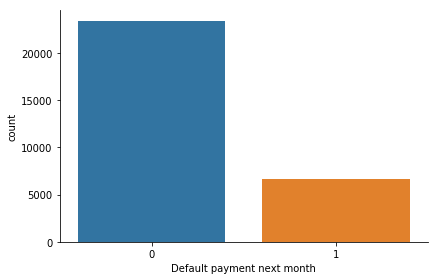

In [21]:
fg = sns.factorplot('DEFAULT', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Default payment next month')
#0 is No default, 1 is default

In [27]:
#count of Marriage statuses
credit.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

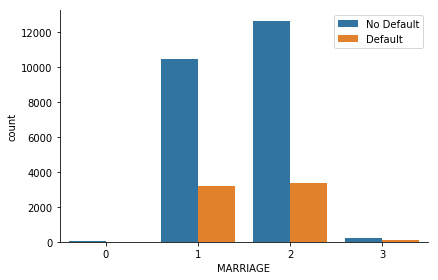

In [32]:
# Default by marriage
sns.factorplot('MARRIAGE', data = credit, hue='DEFAULT', kind='count', aspect = 1.5, legend=False)
plt.legend(['No Default', 'Default'])

In [33]:
# Default by marriage pivot table
credit.pivot_table('DEFAULT', 'MARRIAGE', aggfunc = np.sum, margins = True)

,DEFAULT
MARRIAGE,
0,5
1,3206
2,3341
3,84
All,6636


In [30]:
#age information
credit.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [31]:
#median age
credit.AGE.median()

34.0

C:\Users\twkmn\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Customer Ages')

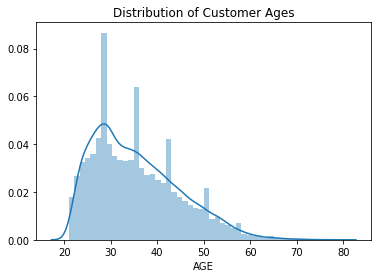

In [18]:
# Distribution of age
age_dist = sns.distplot(credit['AGE'])
age_dist.set_title("Distribution of Customer Ages")

In [17]:
age_bin = [20,30,40,50,60,70,80]
age = pd.cut(credit.AGE, age_bin)

credit.pivot_table('DEFAULT', age, aggfunc = np.sum, margins = True)

,DEFAULT
AGE,
"(20, 30]",2471
"(30, 40]",2189
"(50, 60]",1399
"(40, 50]",504
"(60, 70]",68
"(70, 80]",5
All,6636


C:\Users\twkmn\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Limit Balance')

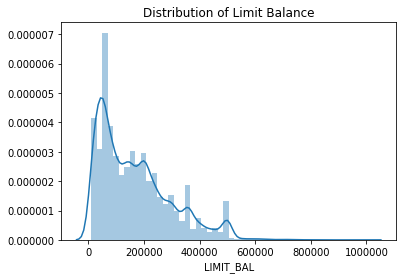

In [19]:
# Distribution of credit limit
limit_dist = sns.distplot(credit['LIMIT_BAL'])
limit_dist.set_title("Distribution of Limit Balance")

In [37]:
# Break credit limit balances into groups
limit_bin = [0,200000,400000,600000,800000,1000000]
limit = pd.cut(credit.LIMIT_BAL, limit_bin)

credit.pivot_table('DEFAULT', limit, aggfunc = np.sum, margins = True)

,DEFAULT
LIMIT_BAL,
"(0, 200000]",5219
"(400000, 600000]",1200
"(200000, 400000]",211
"(600000, 800000]",6
"(800000, 1000000]",0
All,6636


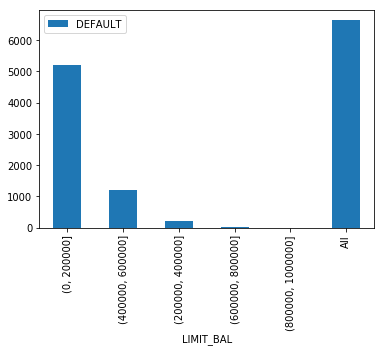

In [35]:
# Plot limit balance bins by default
limit_plot = credit.pivot_table('DEFAULT', index = limit, aggfunc = np.sum, margins = True)
limit_plot.plot(kind='bar')

In [28]:
# Payment status information 
credit.iloc[:,[5,6,7,8,9,10,23]].sort_values("DEFAULT")

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT
14999,0,0,0,0,0,0,0
16193,-1,-1,-1,-1,-1,-1,0
16192,0,0,0,0,0,0,0
26347,2,2,2,2,0,0,0
26348,-2,-2,-2,-2,-2,-2,0
16189,0,-1,0,0,0,0,0
26349,-1,-1,-1,-1,-1,-1,0
16187,2,0,0,0,0,0,0
16186,-1,-1,-2,-2,-2,-2,0
16185,-1,0,0,0,0,0,0


In [54]:
# Table for default in limit balance bins and sex
table1 = pd.crosstab(index=[credit.DEFAULT], columns=[limit,credit.SEX])
table1

LIMIT_BAL (0, 200000]       (200000, 400000]      (400000, 600000]        \
SEX                 1     2                1    2                1     2   
DEFAULT                                                                    
0                5895  9264              673  841             2413  4205   
1                2298  2921              105  106              469   731   

LIMIT_BAL (600000, 800000]     (800000, 1000000]  
SEX                      1   2                 2  
DEFAULT                                           
0                       34  38                 1  
1                        1   5                 0

In [61]:
# Table showing default in limit balance groups and education levels
print('Sex:  1: Male, 2: Female' '\n' 'Default:  0: No Default, 1: Default')

table2 = pd.crosstab(index=[credit.DEFAULT, limit], columns=[credit.SEX,credit.EDUCATION])
table2

Sex:  1: Male, 2: Female
Default:  0: No Default, 1: Default


SEX                           1                      2                 
EDUCATION                     1     2     3    4     1     2     3    4
DEFAULT LIMIT_BAL                                                      
0       (0, 200000]        1741  2919  1130  105  2695  4630  1762  177
        (400000, 600000]   1259   852   259   43  1937  1784   398   86
        (200000, 400000]    430   182    53    8   446   310    70   15
        (600000, 800000]     18    13     3    0    22    10     5    1
        (800000, 1000000]     0     0     0    0     1     0     0    0
1       (0, 200000]         584  1217   485   12   742  1568   596   15
        (400000, 600000]    252   167    49    1   332   310    85    4
        (200000, 400000]     69    24    11    1    54    41    11    0
        (600000, 800000]      1     0     0    0     2     3     0    0

In [62]:
table2.columns, table2.index

(MultiIndex(levels=[[1, 2], [1, 2, 3, 4]],
            labels=[[0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 2, 3, 0, 1, 2, 3]],
            names=['SEX', 'EDUCATION']),
 MultiIndex(levels=[[0, 1], [(0, 200000], (400000, 600000], (200000, 400000], (600000, 800000], (800000, 1000000]]],
            labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 2, 3, 4, 0, 1, 2, 3]],
            names=['DEFAULT', 'LIMIT_BAL']))

In [63]:
# Change names of columns
table2.columns.set_levels(['Male', 'Female'], level = 0, inplace=True)
table2.columns.set_levels(['Grad', 'Univ', 'HS', 'Other'], level = 1, inplace=True)
table2

SEX                        Male                   Female                  
EDUCATION                  Grad  Univ    HS Other   Grad  Univ    HS Other
DEFAULT LIMIT_BAL                                                         
0       (0, 200000]        1741  2919  1130   105   2695  4630  1762   177
        (400000, 600000]   1259   852   259    43   1937  1784   398    86
        (200000, 400000]    430   182    53     8    446   310    70    15
        (600000, 800000]     18    13     3     0     22    10     5     1
        (800000, 1000000]     0     0     0     0      1     0     0     0
1       (0, 200000]         584  1217   485    12    742  1568   596    15
        (400000, 600000]    252   167    49     1    332   310    85     4
        (200000, 400000]     69    24    11     1     54    41    11     0
        (600000, 800000]      1     0     0     0      2     3     0     0

In [67]:
# Table for default by limit balance bins, marriage status, and education levels
table3 = pd.crosstab(index=[credit.DEFAULT, limit], columns=[credit.MARRIAGE,credit.EDUCATION])
# Change names of columns
table3.columns.set_levels(['Married', 'Single', 'Divorced', 'Other'], level = 0, inplace=True)
table3.columns.set_levels(['Grad', 'Univ', 'HS', 'Other'], level = 1, inplace=True)
table3

MARRIAGE                  Married          Single                   Divorced  \
EDUCATION                    Grad Univ  HS   Grad  Univ    HS Other     Grad   
DEFAULT LIMIT_BAL                                                              
0       (0, 200000]             1    3  36   1158  3368  1610   129     3251   
        (400000, 600000]        3    2   4   1339  1493   419    74     1845   
        (200000, 400000]        0    0   0    442   303    74    14      432   
        (600000, 800000]        0    0   0     13    12     4     0       27   
        (800000, 1000000]       0    0   0      1     0     0     0        0   
1       (0, 200000]             0    1   4    404  1325   657    12      913   
        (400000, 600000]        0    0   0    287   295    84     4      294   
        (200000, 400000]        0    0   0     77    43    13     1       45   
        (600000, 800000]        0    0   0      1     3     0     0        2   

MARRIAGE                                    Other                 
EDUCATION                  Univ    HS Other  Grad Univ  HS Other  
DEFAULT LIMIT_BAL                                                 
0       (0, 200000]        4074  1177   147    26  104  69     6  
        (400000, 600000]   1127   229    53     9   14   5     2  
        (200000, 400000]    189    47     9     2    0   2     0  
        (600000, 800000]     11     4     1     0    0   0     0  
        (800000, 1000000]     0     0     0     0    0   0     0  
1       (0, 200000]        1415   393    15     9   44  27     0  
        (400000, 600000]    182    50     1     3    0   0     0  
        (200000, 400000]     22     9     0     1    0   0     0  
        (600000, 800000]      0     0     0     0    0   0     0

In [68]:
# Table for default by limit balance groups, sex, marriage status, and education levels
table4 = pd.crosstab(index=[credit.DEFAULT, limit], columns=[credit.SEX,credit.MARRIAGE,credit.EDUCATION])
# Change names of columns
table4.columns.set_levels(['Male','Female'], level = 0, inplace=True)
table4.columns.set_levels(['Married', 'Single', 'Divorced', 'Other'], level = 1, inplace=True)
table4.columns.set_levels(['Grad', 'Univ', 'HS', 'Other'], level = 2, inplace=True)
table4

SEX                          Male                                            \
MARRIAGE                  Married          Single                  Divorced   
EDUCATION                    Grad Univ  HS   Grad  Univ   HS Other     Grad   
DEFAULT LIMIT_BAL                                                             
0       (0, 200000]             0    0  10    484  1114  541    39     1242   
        (400000, 600000]        1    1   0    572   483  167    29      682   
        (200000, 400000]        0    0   0    239   121   35     4      190   
        (600000, 800000]        0    0   0      5     9    2     0       13   
        (800000, 1000000]       0    0   0      0     0    0     0        0   
1       (0, 200000]             0    0   2    204   521  258     8      373   
        (400000, 600000]        0    0   0    135   106   37     1      115   
        (200000, 400000]        0    0   0     50    16    8     1       18   
        (600000, 800000]        0    0   0      1     0    0     0        0   

SEX                                   ...  Female                            \
MARRIAGE                              ...  Single       Divorced              
EDUCATION                  Univ   HS  ...      HS Other     Grad  Univ   HS   
DEFAULT LIMIT_BAL                     ...                                     
0       (0, 200000]        1766  556  ...    1069    90     2009  2308  621   
        (400000, 600000]    363   91  ...     252    45     1163   764  138   
        (200000, 400000]     61   17  ...      39    10      242   128   30   
        (600000, 800000]      4    1  ...       2     0       14     7    3   
        (800000, 1000000]     0    0  ...       0     0        0     0    0   
1       (0, 200000]         677  214  ...     399     4      540   738  179   
        (400000, 600000]     61   12  ...      47     3      179   121   38   
        (200000, 400000]      8    3  ...       5     0       27    14    6   
        (600000, 800000]      0    0  ...       0     0        2     0    0   

SEX                                                   
MARRIAGE                        Other                 
EDUCATION                 Other  Grad Univ  HS Other  
DEFAULT LIMIT_BAL                                     
0       (0, 200000]          83    11   65  46     4  
        (400000, 600000]     39     5    9   4     2  
        (200000, 400000]      5     1    0   1     0  
        (600000, 800000]      1     0    0   0     0  
        (800000, 1000000]     0     0    0   0     0  
1       (0, 200000]          11     2   25  16     0  
        (400000, 600000]      1     1    0   0     0  
        (200000, 400000]      0     0    0   0     0  
        (600000, 800000]      0     0    0   0     0  

[9 rows x 30 columns]

In [69]:
header = credit.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')


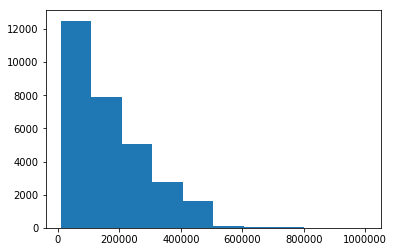

In [70]:
#histogram for limit balance
plt.hist(credit['LIMIT_BAL'])
plt.show()

(array([2.3283e+04, 6.5110e+03, 2.0000e+02, 6.0000e+00]),
 array([  10000.,  257500.,  505000.,  752500., 1000000.]),
 <a list of 4 Patch objects>)

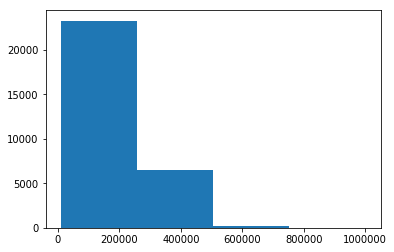

In [71]:
#binning histogram
plt.hist(credit['LIMIT_BAL'], bins=4)

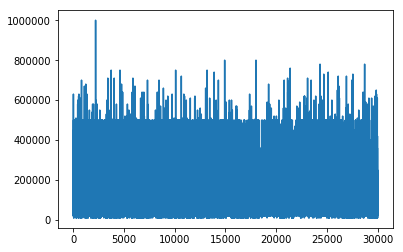

In [72]:
#line plot
plt.plot(credit['LIMIT_BAL'])
plt.show()

In [73]:
#scatter plot for two features
x = credit['PAY_0']
y = credit['PAY_2']

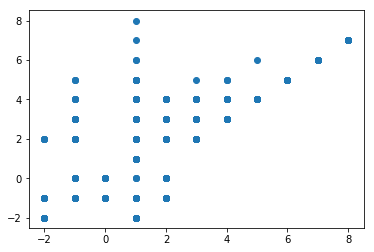

In [74]:
plt.scatter(x,y)
plt.show()

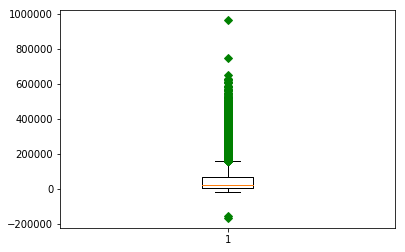

In [75]:
#box plot
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

In [76]:
#correlation
corrMat = credit.corr()
print(corrMat)

           LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
LIMIT_BAL   1.000000  0.024755  -0.231088 -0.108139  0.144713 -0.271214   
SEX         0.024755  1.000000   0.013627 -0.031389 -0.090874 -0.057643   
EDUCATION  -0.231088  0.013627   1.000000 -0.149134  0.182434  0.112593   
MARRIAGE   -0.108139 -0.031389  -0.149134  1.000000 -0.414170  0.019917   
AGE         0.144713 -0.090874   0.182434 -0.414170  1.000000 -0.039447   
PAY_0      -0.271214 -0.057643   0.112593  0.019917 -0.039447  1.000000   
PAY_2      -0.296382 -0.070771   0.129703  0.024199 -0.050148  0.672164   
PAY_3      -0.286123 -0.066096   0.122425  0.032688 -0.053048  0.574245   
PAY_4      -0.267460 -0.060173   0.116531  0.033122 -0.049722  0.538841   
PAY_5      -0.249411 -0.055064   0.104088  0.035629 -0.053826  0.509426   
PAY_6      -0.235195 -0.044008   0.088986  0.034345 -0.048773  0.474553   
BILL_AMT1   0.285430 -0.033642   0.016597 -0.023472  0.056239  0.187068   
BILL_AMT2   0.278314 -0.0

In [77]:
#covariance
covMat = credit.cov()
print(covMat)

              LIMIT_BAL          SEX     EDUCATION     MARRIAGE  \
LIMIT_BAL  1.683446e+10  1571.050630 -22322.227579 -7323.669658   
SEX        1.571051e+03     0.239247      0.004962    -0.008014   
EDUCATION -2.232223e+04     0.004962      0.554272    -0.057954   
MARRIAGE  -7.323670e+03    -0.008014     -0.057954     0.272452   
AGE        1.730767e+05    -0.409726      1.251988    -1.992764   
PAY_0     -3.954593e+04    -0.031685      0.094202     0.011683   
PAY_2     -4.603765e+04    -0.041442      0.115604     0.015122   
PAY_3     -4.443225e+04    -0.038694      0.109088     0.020421   
PAY_4     -4.057181e+04    -0.034411      0.101430     0.020213   
PAY_5     -3.667056e+04    -0.030521      0.087814     0.021074   
PAY_6     -3.509308e+04    -0.024754      0.076186     0.020616   
BILL_AMT1  2.727020e+09 -1211.694332    909.885257  -902.154685   
BILL_AMT2  2.570130e+09 -1085.595467    634.798683  -802.517866   
BILL_AMT3  2.548533e+09  -833.207432    346.636738  -901.67908

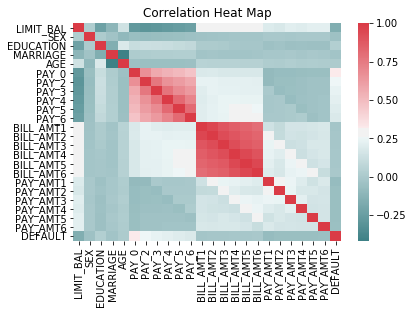

In [88]:
# Create Heat Map
#print correlation map
corrmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corrMat,
            xticklabels = corrMat.columns.values,
            yticklabels = corrMat.columns.values,
            cmap = corrmap)
plt.plot()
plt.title('Correlation Heat Map')
plt.show()